# Import libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [15]:
# Create a path
path = r'C:\Users\shaiv\Downloads\ClimateWins'

In [17]:
# Import dataset
climate = pd.read_csv(os.path.join(path, '02 Data', 'weather prediction dataset processed scaled.csv'))

In [19]:
climate.head()

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [21]:
climate = climate.round(3)

In [23]:
climate = climate.drop(columns=['Unnamed: 0'])

In [25]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.661,-0.028,0.826,-0.002,-1.101,-0.265,-0.179,-0.903,...,-0.444,0.762,-1.300,-0.806,-0.088,-0.025,0.372,-0.668,-0.520,-0.752
1,19600102,1,0.245,-0.028,0.736,-0.002,-1.058,1.659,-0.179,-0.810,...,0.783,1.184,-1.262,-1.042,0.503,-0.025,-0.829,-0.548,-0.629,-0.407
2,19600103,1,1.076,-0.028,1.278,-0.002,-1.251,0.156,-0.179,-1.065,...,0.783,1.184,-0.433,-1.136,-0.396,-0.025,-1.010,-0.067,0.054,-0.177
3,19600104,1,-1.002,-0.028,1.458,-0.002,-0.822,-0.446,-0.179,-0.114,...,0.783,0.481,0.388,-1.183,0.669,-0.025,-1.040,-0.999,-0.164,-0.839
4,19600105,1,0.245,-0.028,1.729,-0.002,-0.747,-0.165,-0.179,0.187,...,-1.670,-0.363,1.730,-0.795,-0.491,-0.025,0.673,-1.509,-1.340,-1.471


In [27]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Columns: 170 entries, DATE to VALENTIA_temp_max
dtypes: float64(168), int64(2)
memory usage: 29.8 MB


In [29]:
climate.shape

(22950, 170)

In [31]:
# Importing Pleasant weather dataset
pleasantweather = pd.read_csv(os.path.join(path, '02 Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [33]:
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
pleasantweather.shape

(22950, 16)

### 02 Filtering, Wrangling, and Scaling

In [47]:
#Reduce your dataset to a single year 2020
climate2020 = climate[climate['DATE'].astype(str).str.contains('2020')] 
climate2020

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
762,19620201,2,1.076,-0.028,-0.077,-0.002,-1.176,0.396,-0.179,-1.065,...,0.170,-1.066,1.730,-0.583,-0.195,-0.025,0.042,-1.089,-0.820,-1.212
763,19620202,2,0.661,-0.028,0.736,-0.002,-0.972,-0.225,1.316,-0.903,...,1.396,0.902,1.646,-1.066,-0.124,-0.025,-1.040,-0.698,-0.492,-0.867
764,19620203,2,0.661,-0.028,0.645,-0.002,-0.757,-0.446,0.818,-0.509,...,0.783,0.481,0.938,-0.830,-0.136,-0.025,-0.829,-0.578,-0.383,-0.752
765,19620204,2,1.076,-0.028,1.097,-0.002,-1.166,-0.125,0.818,-1.065,...,1.396,0.762,0.322,-1.101,-0.242,-0.025,-1.040,-0.458,-0.328,-0.493
766,19620205,2,0.245,-0.028,0.013,-0.002,-1.090,-0.425,0.319,-1.042,...,0.783,-0.644,0.788,-0.948,-0.266,-0.025,-1.040,-0.338,-0.028,-0.666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22681,20220205,2,-1.002,-0.028,-0.348,1.389,-0.382,-0.446,-0.179,0.698,...,-0.444,-0.082,-0.004,-0.005,-0.006,-0.025,-0.018,-0.007,-0.001,-0.005
22682,20220206,2,1.076,-0.028,-1.071,0.304,-1.112,0.737,-0.179,-1.065,...,-0.444,-0.082,-0.004,-0.005,-0.006,-0.025,-0.018,-0.007,-0.001,-0.005
22683,20220207,2,-1.418,-0.028,-0.981,1.450,-0.435,-0.446,-0.179,0.350,...,-0.444,-0.082,-0.004,-0.005,-0.006,-0.025,-0.018,-0.007,-0.001,-0.005
22684,20220208,2,-1.418,-0.028,-1.252,2.581,-0.167,-0.446,-0.179,0.976,...,-0.444,-0.082,-0.004,-0.005,-0.006,-0.025,-0.018,-0.007,-0.001,-0.005


In [40]:
climate2020.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
count,4.290000e+02,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,...,429.000000,429.000000,429.000000,429.000000,429.000000,4.290000e+02,429.000000,429.000000,429.000000,429.000000
mean,2.015948e+07,5.850816,-0.214259,-0.002331,-0.388329,0.139807,-0.175333,-0.097210,-0.058170,0.148664,...,-0.345317,-0.061007,-0.053410,-0.116508,0.017555,-2.500000e-02,-0.083783,-0.077907,-0.050508,-0.093235
std,1.255625e+05,3.569881,1.047111,1.534384,1.223523,1.283898,0.939789,0.722785,0.733455,1.075173,...,0.379598,0.282256,0.490324,0.304557,0.241203,1.979894e-16,0.244592,0.251796,0.260903,0.279324
min,1.962020e+07,1.000000,-2.249000,-1.802000,-3.600000,-5.382000,-1.305000,-0.446000,-0.179000,-1.065000,...,-1.670000,-1.769000,-4.068000,-1.183000,-0.491000,-2.500000e-02,-1.040000,-1.660000,-2.077000,-1.529000
25%,2.020022e+07,2.000000,-1.002000,-0.983000,-1.252000,-0.552000,-0.886000,-0.446000,-0.179000,-0.949000,...,-0.444000,-0.082000,-0.004000,-0.005000,-0.006000,-2.500000e-02,-0.018000,-0.007000,-0.001000,-0.005000
50%,2.020061e+07,5.000000,-0.171000,-0.437000,-0.168000,0.120000,-0.543000,-0.446000,-0.179000,-0.021000,...,-0.444000,-0.082000,-0.004000,-0.005000,-0.006000,-2.500000e-02,-0.018000,-0.007000,-0.001000,-0.005000
75%,2.020092e+07,9.000000,0.661000,0.382000,0.645000,0.854000,0.639000,-0.105000,-0.179000,0.953000,...,-0.444000,-0.082000,-0.004000,-0.005000,-0.006000,-2.500000e-02,-0.018000,-0.007000,-0.001000,-0.005000
max,2.022021e+07,12.000000,1.076000,9.527000,1.910000,3.834000,1.938000,4.284000,7.298000,2.391000,...,1.396000,1.887000,1.758000,-0.005000,2.042000,-2.500000e-02,0.552000,0.203000,0.546000,-0.005000


In [49]:
# Check for missing values
climate2020.isnull().sum()

DATE                   0
MONTH                  0
BASEL_cloud_cover      0
BASEL_wind_speed       0
BASEL_humidity         0
                      ..
VALENTIA_snow_depth    0
VALENTIA_sunshine      0
VALENTIA_temp_mean     0
VALENTIA_temp_min      0
VALENTIA_temp_max      0
Length: 170, dtype: int64

##### Scaling

In [51]:
# Drop non-numeric or identifier columns
numeric_cols = climate2020.drop(columns=['DATE', 'MONTH']).reset_index(drop=True)

In [53]:
# Scaling using the StandardScaler() command from the sklearn library
scaler = StandardScaler()

In [55]:
# Scale the numerical columns, now excluding 'DATE' as the identifier
scaled_data = scaler.fit_transform(numeric_cols)

In [57]:
# Create a DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols.columns)

In [59]:
# Combine with DATE and MONTH from filtered DataFrame
climate2020_scaled = pd.concat([climate2020[['DATE', 'MONTH']].reset_index(drop=True), scaled_df], axis=1)

In [61]:
climate2020_scaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19620201,2,1.233647,-0.016749,0.254750,-0.110579,-1.066021,0.683171,-0.164933,-1.130126,...,1.359118,-3.564726,3.641454,-1.533497,-0.882256,3.469447e-18,0.514858,-4.020214,-2.952789,-4.009938
1,19620202,2,0.836856,-0.016749,0.920000,-0.110579,-0.848698,-0.177009,1.875746,-0.979277,...,4.592619,3.415801,3.469939,-3.121261,-0.587555,3.469447e-18,-3.914006,-2.465556,-1.694147,-2.773370
2,19620203,2,0.836856,-0.016749,0.845538,-0.110579,-0.619656,-0.483128,1.195975,-0.612396,...,2.975868,1.922507,2.024310,-2.345459,-0.637363,3.469447e-18,-3.050336,-1.988424,-1.275879,-2.361180
3,19620204,2,1.233647,-0.016749,1.215394,-0.110579,-1.055368,-0.038494,1.195975,-1.130126,...,4.592619,2.919219,0.766531,-3.236317,-1.077340,3.469447e-18,-3.914006,-1.511291,-1.064826,-1.432858
4,19620205,2,0.439108,-0.016749,0.328394,-0.110579,-0.974404,-0.454039,0.514838,-1.108709,...,2.975868,-2.067885,1.718032,-2.733360,-1.176957,3.469447e-18,-3.914006,-1.034158,0.086371,-2.052934


In [63]:
climate2020_scaled.shape

(429, 170)

### 03 Dendrograms

### Define the specific columns we want to include in the clustering analysis

### Focusing on two weather stations: Madrid and Sonnblick 2020

In [66]:
# For each station, we include 10 common weather features to ensure a fair comparison
columns_to_use = [
    # Madrid features
    'MADRID_cloud_cover', 
    'MADRID_wind_speed', 
    'MADRID_humidity', 
    'MADRID_pressure',
    'MADRID_global_radiation', 
    'MADRID_precipitation', 
    'MADRID_sunshine',
    'MADRID_temp_mean', 
    'MADRID_temp_min', 
    'MADRID_temp_max',
    
    # Sonnblick features
    'SONNBLICK_cloud_cover', 
    'SONNBLICK_wind_speed', 
    'SONNBLICK_humidity', 
    'SONNBLICK_pressure',
    'SONNBLICK_global_radiation', 
    'SONNBLICK_precipitation', 
    'SONNBLICK_sunshine',
    'SONNBLICK_temp_mean', 
    'SONNBLICK_temp_min', 
    'SONNBLICK_temp_max'
]

# Extract the selected columns from the scaled dataset
# This 'X' DataFrame will be used for generating the dendrogram
X = climate2020_scaled[columns_to_use]

#### **Single** linkage method - Perform hierarchical clustering
#### 'single' considers the minimum distance between any two points in different clusters when deciding which clusters to merge next.

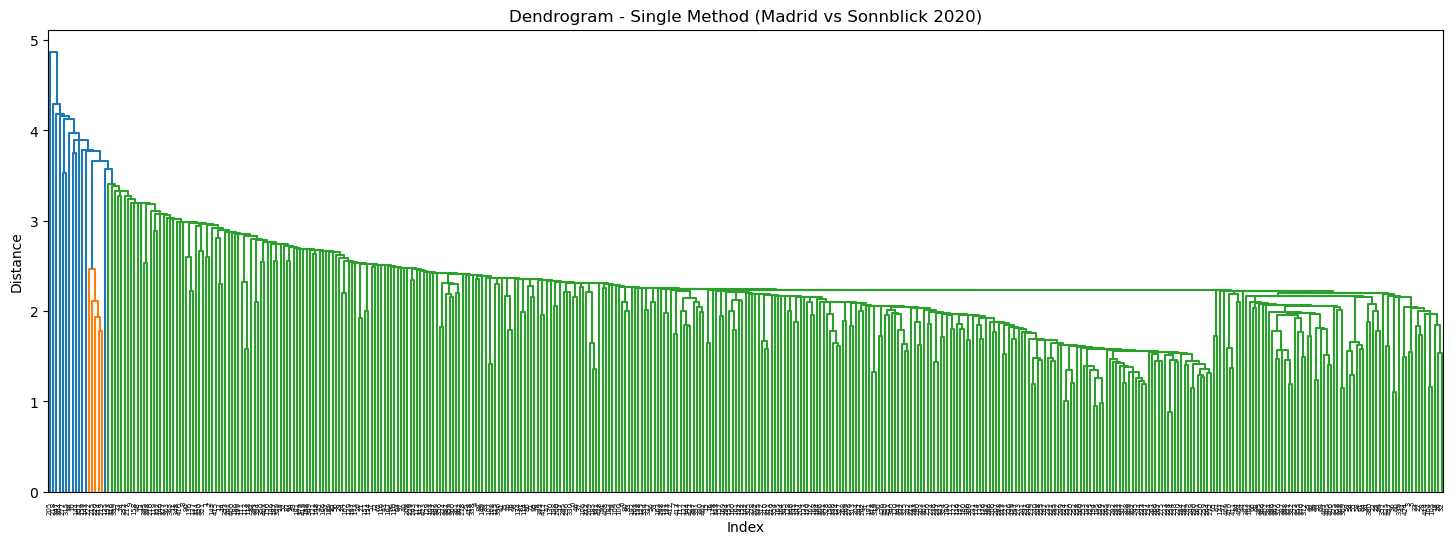

In [69]:
distance = linkage(X, method='single')  

# Create a new figure for the dendrogram
plt.figure(figsize=(18, 6))

# Generate the dendrogram from the linkage matrix
dendrogram(distance, leaf_rotation=90)

# Label the axes
plt.xlabel('Index')  # Index represents the individual data points (e.g., daily observations)
plt.ylabel('Distance')  # Distance shows how similar or different clusters are

# Add a title describing the method and the cities compared
plt.title("Dendrogram - Single Method (Madrid vs Sonnblick 2020)")

# Display the dendrogram
plt.show()

#### **Complete** linkage method - Perform hierarchical clustering
#### 'complete' considers the maximum distance between points in different clusters

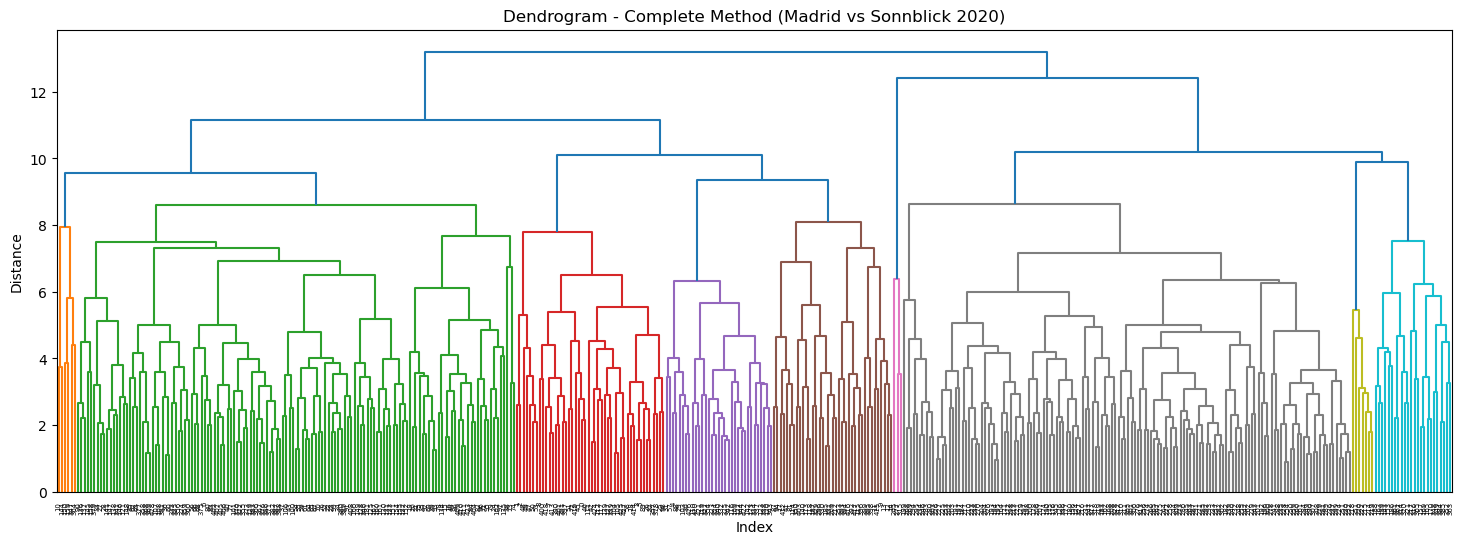

In [72]:
distance = linkage(X, method='complete')  

# Create a new figure for the dendrogram
plt.figure(figsize=(18, 6))

# Generate the dendrogram from the linkage matrix
dendrogram(distance, leaf_rotation=90)

# Label the axes
plt.xlabel('Index')  # Index represents the individual data points (e.g., daily observations)
plt.ylabel('Distance')  # Distance shows how similar or different clusters are

# Add a title describing the method and the cities compared
plt.title("Dendrogram - Complete Method (Madrid vs Sonnblick 2020)")

# Display the dendrogram
plt.show()

#### **Average** linkage method – Perform hierarchical clustering
#### 'average' considers the average distance between all pairs of points in different clusters to determine which clusters to merge next.

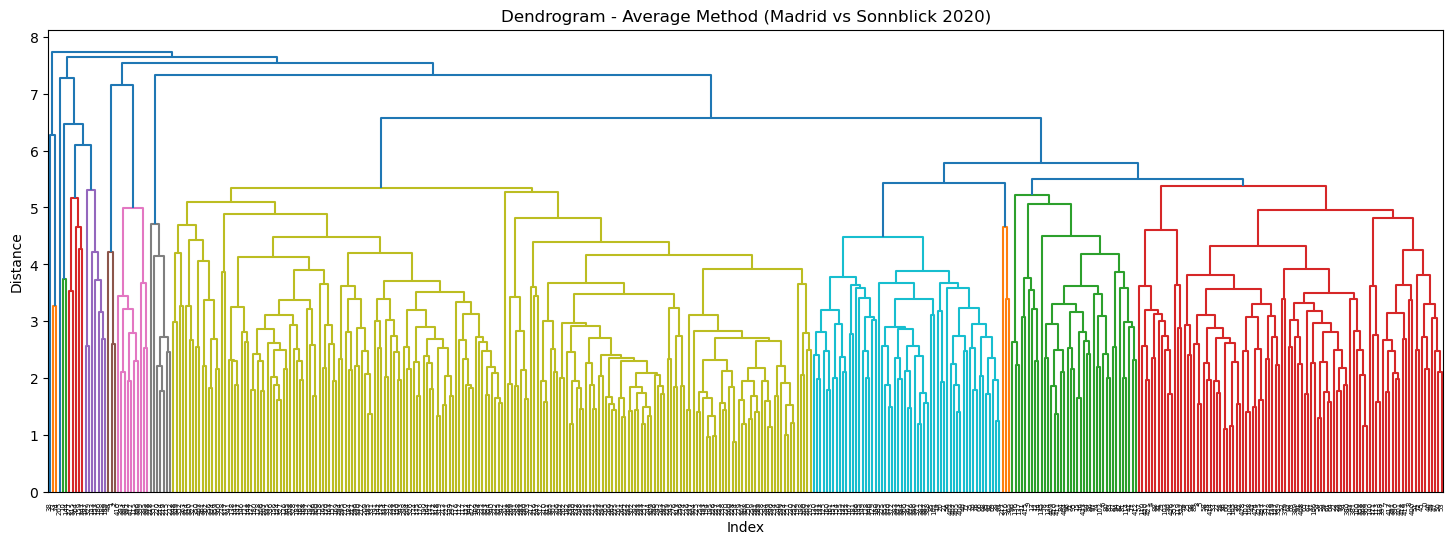

In [74]:
distance = linkage(X, method='average')  

# Create a new figure for the dendrogram
plt.figure(figsize=(18, 6))

# Generate the dendrogram from the linkage matrix
dendrogram(distance, leaf_rotation=90)

# Label the axes
plt.xlabel('Index')  # Index represents the individual data points (e.g., daily observations)
plt.ylabel('Distance')  # Distance shows how similar or different clusters are

# Add a title describing the method and the cities compared
plt.title("Dendrogram - Average Method (Madrid vs Sonnblick 2020)")

# Display the dendrogram
plt.show()

#### **Ward** linkage method – Perform hierarchical clustering
#### 'ward' considers the increase in total within-cluster variance (sum of squared differences) that would result from merging two clusters, 
#### and merges the pair that causes the smallest increase.

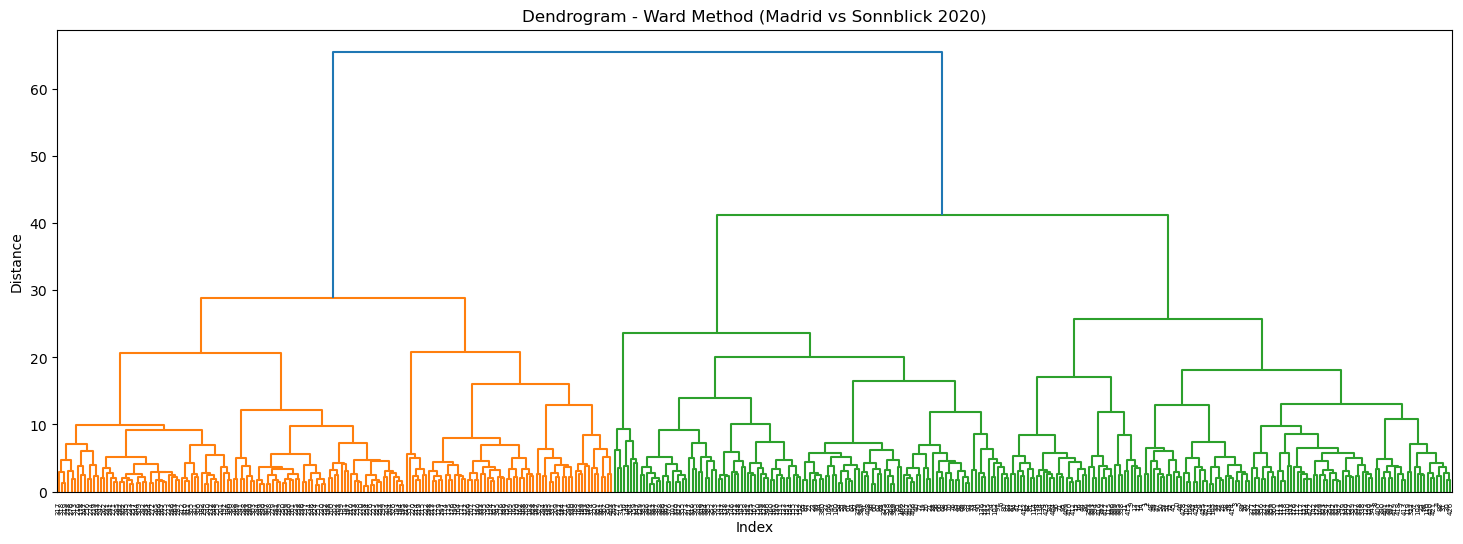

In [77]:
distance = linkage(X, method='ward')  

# Create a new figure for the dendrogram
plt.figure(figsize=(18, 6))

# Generate the dendrogram from the linkage matrix
dendrogram(distance, leaf_rotation=90)

# Label the axes
plt.xlabel('Index')  # Index represents the individual data points (e.g., daily observations)
plt.ylabel('Distance')  # Distance shows how similar or different clusters are

# Add a title describing the method and the cities compared
plt.title("Dendrogram - Ward Method (Madrid vs Sonnblick 2020)")

# Display the dendrogram
plt.show()

### "ClimateWins wants to see how data is clustered"
### So now moving from analyzing individual stations (e.g., Madrid & Sonnblick) to exploring full-pattern clustering across All stations.

In [82]:
# Prepare the full dataset for clustering by removing DATE and MONTH
# As not to write out all the column headers ( as with Madrid and Sonnerblick)
X_all_stations = climate2020_scaled.drop(columns=['DATE', 'MONTH'])

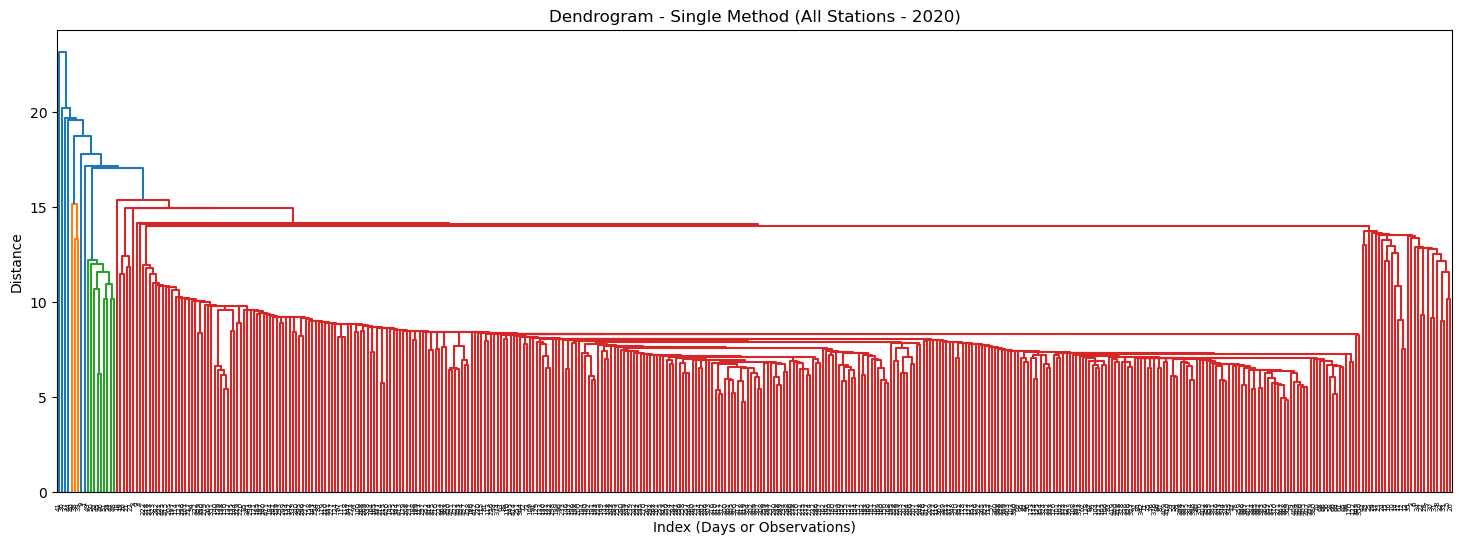

In [84]:
# Single linkage method for all stations
distance1 = linkage(X_all_stations, method='single')
plt.figure(figsize=(18, 6))
dendrogram(distance1, leaf_rotation=90)
plt.title("Dendrogram - Single Method (All Stations - 2020)")
plt.xlabel("Index (Days or Observations)")
plt.ylabel("Distance")
plt.show()

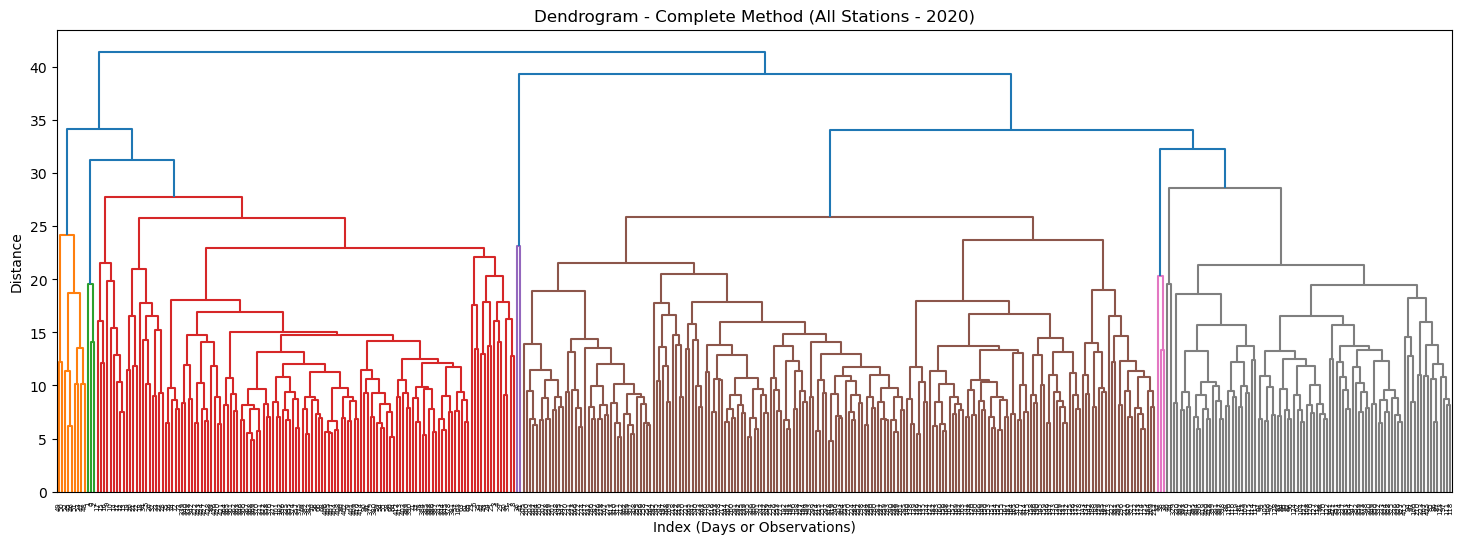

In [86]:
# Complete linkage method for all stations
distance1 = linkage(X_all_stations, method='complete')
plt.figure(figsize=(18, 6))
dendrogram(distance1, leaf_rotation=90)
plt.title("Dendrogram - Complete Method (All Stations - 2020)")
plt.xlabel("Index (Days or Observations)")
plt.ylabel("Distance")
plt.show()

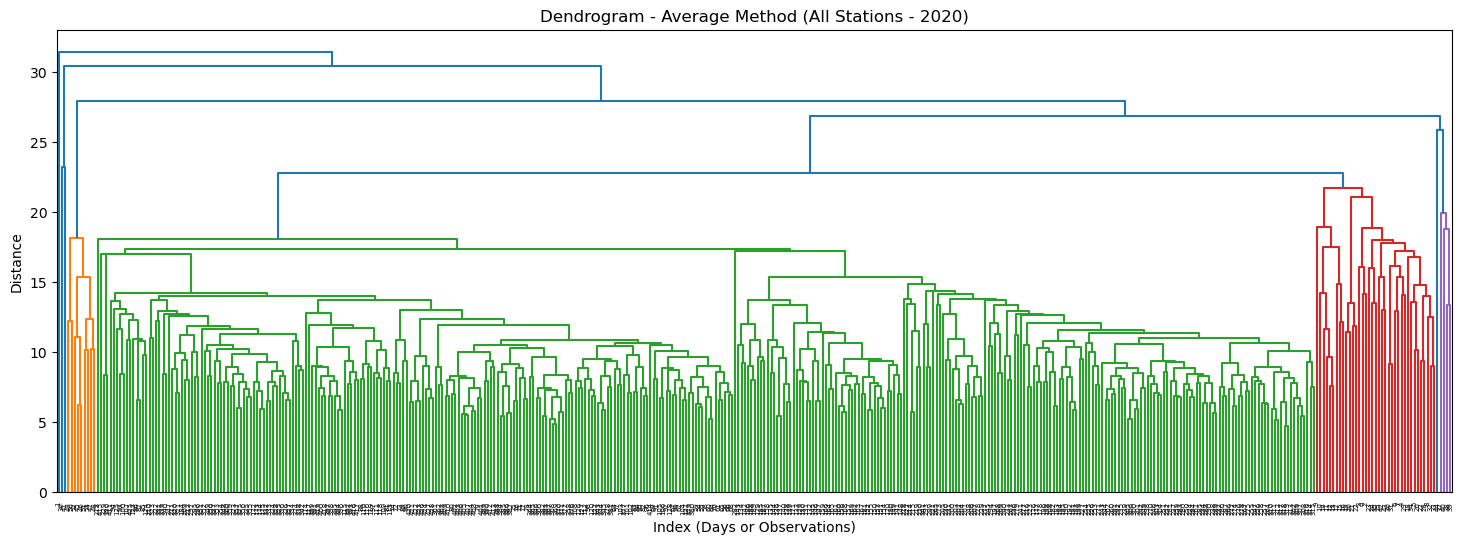

In [88]:
# Average linkage method for all stations
distance1 = linkage(X_all_stations, method='average')
plt.figure(figsize=(18, 6))
dendrogram(distance1, leaf_rotation=90)
plt.title("Dendrogram - Average Method (All Stations - 2020)")
plt.xlabel("Index (Days or Observations)")
plt.ylabel("Distance")
plt.show()

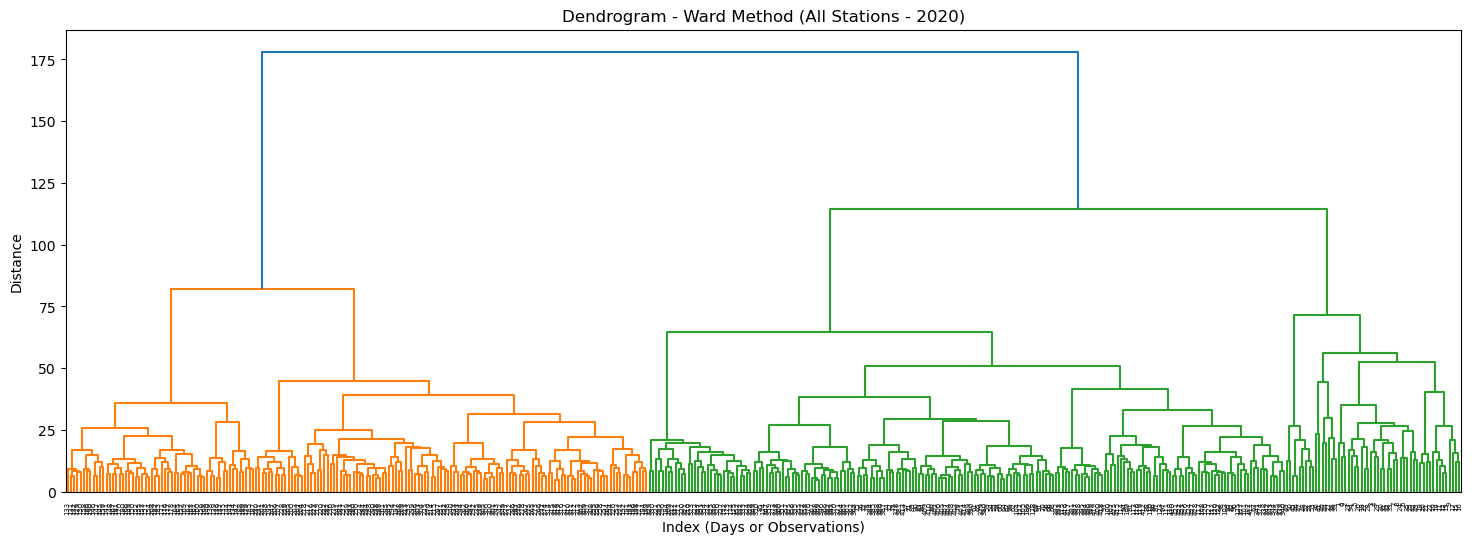

In [89]:
# Ward linkage method for all stations
distance1 = linkage(X_all_stations, method='ward')
plt.figure(figsize=(18, 6))
dendrogram(distance1, leaf_rotation=90)
plt.title("Dendrogram - Ward Method (All Stations - 2020)")
plt.xlabel("Index (Days or Observations)")
plt.ylabel("Distance")
plt.show()

### 04 Insights

### What We Learned from the Dendrograms (Madrid & Sonnblick, and All Stations – 2020)

### Madrid vs Sonnblick – 2020

- Single Linkage Method: This method produces one elongated chain of data points, making it difficult to distinguish meaningful groupings. It performs poorly in cases with significant variation between locations—such as contrasting climates between a city like Madrid and a high-altitude station like Sonnblick.
- Complete Linkage Method: This approach provides better separation between clusters. It is sensitive to differences in elevation and climate, effectively distinguishing between the conditions observed in Madrid and those at Sonnblick.
- Average Linkage Method: This method identifies 2–3 clusters, likely reflecting seasonal variations such as summer and winter. However, the cluster boundaries are somewhat ambiguous, making it less effective for drawing clear conclusions.
- Ward Method: Ward’s method delivers the most distinct and well-formed clusters, typically separating the data into 3–4 coherent groups. It captures the climatic differences with high clarity, offering the most reliable insights among the methods compared.

### All Stations – 2020

- Single Linkage Method: This method lumps nearly all stations into one large cluster, offering little insight into regional climate differences. It fails to capture meaningful variation across locations.
- Complete Linkage Method: This approach separates the data into 4–5 clusters, likely detecting broader geographic distinctions such as coastal versus inland stations. However, the grouping may still lack precision.
- Average Linkage Method: Produces 2–3 broad clusters that reflect general weather patterns, such as seasonal shifts. While useful for an overview, it struggles to reveal finer or more localized climate differences.
- Ward’s Method: Once again, Ward’s method stands out. It organizes stations into 3 well-defined clusters, which appear to align closely with real-world climate types—such as warm coastal areas, cold mountain regions, and temperate inland zones.

### Overall:
- The Ward method gave the best results in both parts.
- The Single method didn’t help much and grouped too much together.

### 05 PCS (Principal Components Analysis)

#### Why Use PCA to Reduce the Size of the Dataset?

Due to ClimateWins’ limited computing resources, I applied Principal Component Analysis (PCA) to reduce the size and complexity of the dataset.

PCA identifies patterns in the data and consolidates similar variables into a smaller set of new variables—called principal components—that retain the most important information. Instead of working with over 170 individual weather features across various stations, we reduced the dataset to just 10 principal components.

These components still capture the key trends—such as temperature fluctuations and humidity variations—while eliminating redundant or less impactful details. This dimensionality reduction not only accelerates the clustering process but also ensures ClimateWins focuses on the most relevant insights.

In [97]:
climate2020_scaled

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19620201,2,1.233647,-0.016749,0.254750,-0.110579,-1.066021,0.683171,-0.164933,-1.130126,...,1.359118,-3.564726,3.641454,-1.533497,-0.882256,3.469447e-18,0.514858,-4.020214,-2.952789,-4.009938
1,19620202,2,0.836856,-0.016749,0.920000,-0.110579,-0.848698,-0.177009,1.875746,-0.979277,...,4.592619,3.415801,3.469939,-3.121261,-0.587555,3.469447e-18,-3.914006,-2.465556,-1.694147,-2.773370
2,19620203,2,0.836856,-0.016749,0.845538,-0.110579,-0.619656,-0.483128,1.195975,-0.612396,...,2.975868,1.922507,2.024310,-2.345459,-0.637363,3.469447e-18,-3.050336,-1.988424,-1.275879,-2.361180
3,19620204,2,1.233647,-0.016749,1.215394,-0.110579,-1.055368,-0.038494,1.195975,-1.130126,...,4.592619,2.919219,0.766531,-3.236317,-1.077340,3.469447e-18,-3.914006,-1.511291,-1.064826,-1.432858
4,19620205,2,0.439108,-0.016749,0.328394,-0.110579,-0.974404,-0.454039,0.514838,-1.108709,...,2.975868,-2.067885,1.718032,-2.733360,-1.176957,3.469447e-18,-3.914006,-1.034158,0.086371,-2.052934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,20220205,2,-0.753178,-0.016749,0.033000,0.974106,-0.220164,-0.483128,-0.164933,0.511524,...,-0.260270,-0.074463,0.100888,0.366560,-0.097769,3.469447e-18,0.269265,0.281933,0.189979,0.316258
425,20220206,2,1.233647,-0.016749,-0.558607,0.128036,-0.997841,1.155508,-0.164933,-1.130126,...,-0.260270,-0.074463,0.100888,0.366560,-0.097769,3.469447e-18,0.269265,0.281933,0.189979,0.316258
426,20220207,2,-1.150926,-0.016749,-0.484963,1.021673,-0.276626,-0.483128,-0.164933,0.187477,...,-0.260270,-0.074463,0.100888,0.366560,-0.097769,3.469447e-18,0.269265,0.281933,0.189979,0.316258
427,20220208,2,-1.150926,-0.016749,-0.706713,1.903613,0.008878,-0.483128,-0.164933,0.770389,...,-0.260270,-0.074463,0.100888,0.366560,-0.097769,3.469447e-18,0.269265,0.281933,0.189979,0.316258


In [99]:
# Drop DATE and other non-feature columns
X = climate2020_scaled.drop(columns=['DATE', 'MONTH'], errors='ignore')

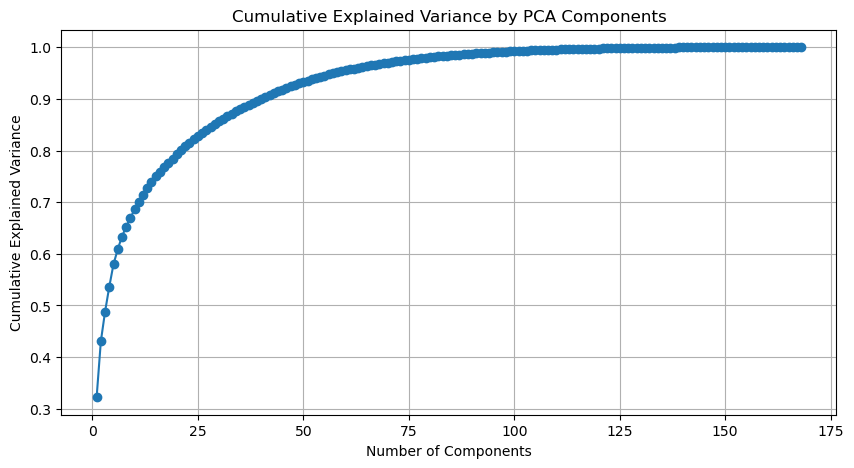

In [101]:
# Run PCA to reduce dimensionality
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot explained variance to decide how many components to keep
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

##### We selected 10 principal components based on the elbow point in the cumulative explained variance plot. At this point, the curve begins to level off, indicating that most of the important patterns in the data have already been captured. Including more components beyond this adds minimal value while increasing complexity, so choosing 10 strikes a balance between efficiency and information retention.

In [106]:
# Run the PCA model, reducing to 10 components 
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)

In [108]:
principalComponents

array([[-14.63726552,   2.44363298,  -6.58795326, ...,  -4.19146416,
          2.55676354,   0.80438054],
       [-14.47225308,   3.72736806,  -8.39542017, ...,  -7.04981374,
          4.88315213,   3.54386337],
       [-14.04480755,   2.11325702,  -7.23746971, ...,  -1.67415841,
          3.58255056,   0.81856094],
       ...,
       [ -3.66048599,   1.40663829,   2.89766187, ...,   0.45648768,
         -1.98464168,  -0.78385816],
       [ -3.83445001,   1.83544951,   1.8796256 , ...,   0.35437402,
         -2.32762415,  -1.30551012],
       [ -2.54527761,   1.93560907,   1.68553898, ...,  -0.63636745,
         -2.63212765,  -1.101947  ]])

In [110]:
# Create DataFrame from PCA results with manually written column names
pca_df = pd.DataFrame(principalComponents, columns=[
    'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 
    'PC6', 'PC7', 'PC8', 'PC9', 'PC10'
])

In [112]:
# Export to CSV
pca_df.to_csv(os.path.join(path, '02 Data', '2010_PCA.csv'), index=False)